# Classification

This page shows how I classified the Raman spectral data after denoised.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Import pre-processed data



In [2]:
all_denoised_data = pd.read_csv('all_denoised_data.csv', index_col=0)
all_denoised_data

,500.3769,501.3411,502.3054,503.2696,504.2338,505.1981,506.1623,507.1265,508.0908,509.055,...,1992.046,1993.01,1993.974,1994.9379999999999,1995.9029999999998,1996.8670000000002,1997.8310000000001,1998.795,1999.76,diagnosis
0,1.037038,1.088265,1.233976,1.347499,1.295797,1.109784,0.973557,1.075938,1.347899,1.531108,...,2.191152,2.406767,2.603309,2.681419,2.691378,2.741203,2.844648,2.844278,2.618507,N
1,6.211912,5.902306,5.713722,5.602013,5.524272,5.470924,5.471811,5.552292,5.657490,5.664200,...,5.040420,5.092443,4.931562,4.788789,4.728263,4.662078,4.481508,4.203521,3.969624,N
2,4.988583,5.032977,5.098549,5.159239,5.215715,5.250594,5.218340,5.068592,4.799335,4.586536,...,4.833457,4.806668,4.909719,5.051993,5.056172,4.897813,4.761009,4.737644,4.811733,N
3,5.035774,5.125359,5.208042,5.284477,5.301366,5.258965,5.189198,5.122413,5.059652,4.897291,...,1.877656,2.043109,2.016493,1.957189,2.030062,2.231939,2.419572,2.477660,2.322978,N
4,6.314343,5.932537,5.653940,5.497581,5.446961,5.467883,5.500728,5.474824,5.418199,5.397387,...,4.336513,4.385986,4.522248,4.492372,4.181757,3.667499,3.182403,2.944281,2.972792,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,4.917788,4.679630,4.202548,3.748590,3.576837,3.715020,4.030479,4.360715,4.602141,4.636234,...,1.364448,1.683123,2.096895,2.503461,2.737105,2.759245,2.765097,2.883808,3.002274,P
516,1.867906,1.947775,2.042472,2.101455,2.078990,2.001350,1.950086,2.012657,2.109786,2.151017,...,1.061596,0.978107,0.857280,0.781880,0.738261,0.692152,0.653411,0.629868,0.603550,P
517,5.851671,5.838641,5.660157,5.436936,5.383870,5.503249,5.682234,5.780665,5.770482,5.732470,...,4.353588,4.230101,4.034263,3.818549,3.702072,3.756657,3.885366,4.022213,4.217064,P
518,6.680988,6.596028,6.692590,6.863513,6.935155,6.906429,6.862923,6.905526,6.990236,7.128619,...,1.447391,1.187667,0.890533,0.786869,0.921657,1.111083,1.183753,1.167107,1.182761,P


In [3]:
X = all_denoised_data.drop(columns='diagnosis')
Y = all_denoised_data['diagnosis']

# Scale the features to have zero mean and standard devisation of 1
X = StandardScaler().fit_transform(X)

## Classification

In [4]:
from sklearn.decomposition import PCA
#Fit the spectral data and extract the explained variance ratio
pca1 = PCA(n_components=10)
trained_pca = pca1.fit_transform(X)
var1 = pca1.explained_variance_ratio_


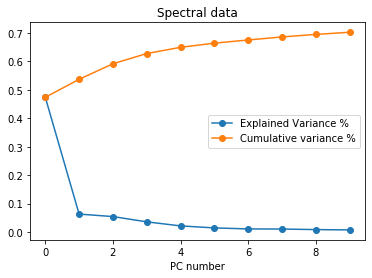

In [5]:
fig, ax = plt.subplots()
ax.plot(var1,'-o', label="Explained Variance %")
ax.plot(np.cumsum(var1),'-o', label = 'Cumulative variance %')
ax.set_xlabel("PC number")
ax.set_title('Spectral data')

plt.legend()
plt.show()

In [6]:
pca_result = pd.DataFrame(data=trained_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_result['Cluster']=Y
pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,-13.132203,1.889143,8.339036,3.038497,4.110537,4.411932,2.927229,-4.101842,6.215943,1.222670,N
1,-12.760252,9.838484,-13.439907,1.857606,-0.433326,1.431097,2.018963,-3.757495,4.255781,0.450133,N
2,-3.519475,-0.014942,-3.193752,13.282621,7.361883,2.674756,-0.569822,-5.351690,12.936824,-1.575555,N
3,-10.364197,-9.356078,6.282531,-1.208660,-4.131806,-6.618909,6.676170,2.333677,2.121385,7.440293,N
4,6.630035,2.027968,-0.102079,-7.448095,-3.766942,6.262954,3.054312,-0.886786,3.431694,2.782984,N
...,...,...,...,...,...,...,...,...,...,...,...
515,-6.503950,8.680263,-2.058014,8.685603,-2.999369,-4.430051,4.645838,0.240356,3.388879,-1.120903,P
516,-36.755937,1.996256,1.001763,4.704421,-1.478775,-2.915166,2.387648,0.683129,-1.021825,-0.981983,P
517,-2.619128,-0.327880,0.114494,9.200099,12.991687,1.269463,-4.978128,-4.571337,-1.540599,-2.520027,P
518,-2.472913,-0.101860,-9.297659,-0.555235,0.643312,1.964263,5.372118,-0.732710,-2.511363,3.581597,P


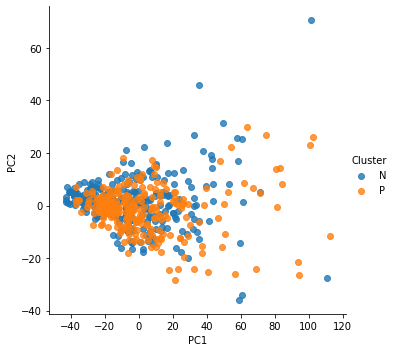

In [7]:
p = sns.lmplot(x='PC1', y='PC2', data=pca_result, hue='Cluster', fit_reg=False, legend=True)

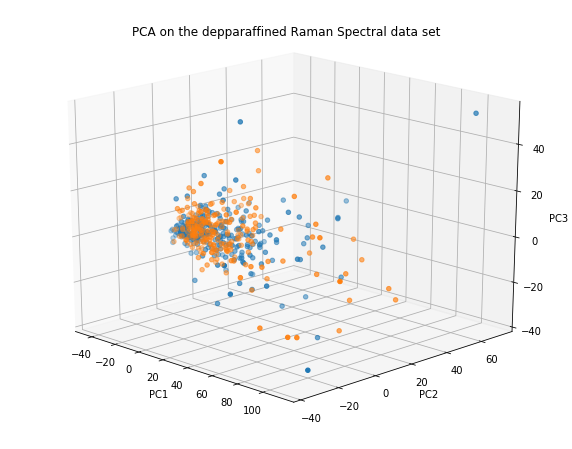

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = 10, 8
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pca_neg = pca_result.loc[pca_result['Cluster']=='N']
x1 = pca_neg['PC1']
y1 = pca_neg['PC2']
z1 = pca_neg['PC3']
pca_pos = pca_result.loc[pca_result['Cluster']=='P']
x2 = pca_pos['PC1']
y2 = pca_pos['PC2']
z2 = pca_pos['PC3']

ax.scatter(x1,y1,z1)
ax.scatter(x2,y2,z2)

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the depparaffined Raman Spectral data set")
ax.view_init(elev=20., azim=-45)

plt.show()

In [9]:
x = pca_result.drop(columns='Cluster')
x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-13.132203,1.889143,8.339036,3.038497,4.110537,4.411932,2.927229,-4.101842,6.215943,1.222670
1,-12.760252,9.838484,-13.439907,1.857606,-0.433326,1.431097,2.018963,-3.757495,4.255781,0.450133
2,-3.519475,-0.014942,-3.193752,13.282621,7.361883,2.674756,-0.569822,-5.351690,12.936824,-1.575555
3,-10.364197,-9.356078,6.282531,-1.208660,-4.131806,-6.618909,6.676170,2.333677,2.121385,7.440293
4,6.630035,2.027968,-0.102079,-7.448095,-3.766942,6.262954,3.054312,-0.886786,3.431694,2.782984
...,...,...,...,...,...,...,...,...,...,...
515,-6.503950,8.680263,-2.058014,8.685603,-2.999369,-4.430051,4.645838,0.240356,3.388879,-1.120903
516,-36.755937,1.996256,1.001763,4.704421,-1.478775,-2.915166,2.387648,0.683129,-1.021825,-0.981983
517,-2.619128,-0.327880,0.114494,9.200099,12.991687,1.269463,-4.978128,-4.571337,-1.540599,-2.520027
518,-2.472913,-0.101860,-9.297659,-0.555235,0.643312,1.964263,5.372118,-0.732710,-2.511363,3.581597


In [10]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
x_train.shape

(390, 10)

#### Supoort Vector Machine

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'kernel': ('rbf', 'poly'), 'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}    

grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.542, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.546, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.543, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.557, total=   1.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.600, total=   3.6s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.550, total=   2.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ..........

[CV] ......... C=100, gamma=1, kernel=poly, score=0.557, total=   1.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.600, total=   4.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.550, total=   2.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.542, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.538, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.543, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] ....... C=100, gamma=0.1, kernel=poly, score=0.557, total=   0.7s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.3min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [14]:
grid_pred = grid.predict(x_test)

print(list(grid_pred).count(0))
print(list(grid_pred).count(1))

84
46


In [15]:
print(grid.score(x_test, y_test))

0.6307692307692307


In [16]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


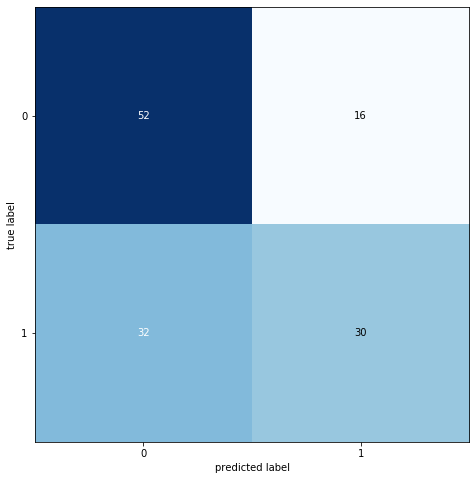

In [17]:
# plot condusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matrix = confusion_matrix(y_test, grid_pred)
fig, ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

|             | Predicted: Neg | Predicted: Pos |
|-------------|-------------------|-----------------------|
| Actual: Neg | True Negative (TN) | False Positive (FP)  |
| Actual: Pos | False Negative (FN) | True Positive (TP)   |

The predicted classes are represented in the columns of the matrix, whereas the actual classes are in the rows of the matrix. We then have four cases:

* True Negative (TN): the classifier predicted negative and the samples actually did not infect CWD.
* True Positive (TP): the classifier predicted postive and the samples actually infected CWD.
* False Negatives (FN): the classifier predicted negative but the samples actually infected CWD.
* False Positives (FP): tthe classifier predicted positive but the samples actually did not infect CWD.

#### Neural Network

In [18]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd

Using TensorFlow backend.


In [21]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu'))
    model.add(Dense(9, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model


In [22]:
model = KerasClassifier(build_fn=create_model, verbose=0)
model.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_test, y_test))

In [23]:
# evaluate the keras model
score = model.score(x_test, y_test)
print(score)

0.5


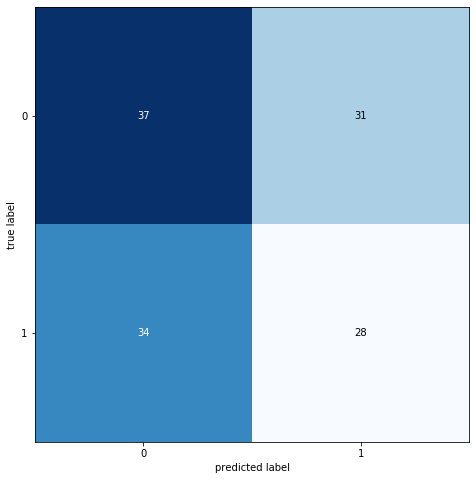

In [24]:
# plot confusion matrix
y_pred=model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred )
fig, ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()